#***A prediction of marriage probability in student life in Bangladesh***

#**Mount the drive and read the Dataset**

In [35]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
import pandas as pd

In [37]:
train = pd.read_csv('gdrive/My Drive/AI_Project/mp_dataset.csv')

In [38]:
train.head()

,Timestamp,বয়স :,লিঙ্গ :,ধর্ম :,ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?,আপনি পড়াশুনার কোন পর্যায়ে আছেন?,আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?,আপনার মতে কোনটা আগে?,আপনার বর্তমান আয়ের উৎস কি?,আপনার পরিবারের আয়ের উৎস কি?,আপনার পারিবারিক অবস্থা কি?,আপনি কি যৌথ পরিবারের সদস্য?,আপনার পরিবারের সদস্য সংখ্যা কত?,আপনার বাবা-মা উভয়ই আছেন?,আপনার ভাই-বোন কয় জন?,আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?,আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?,আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?,পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?,আপনার বৈবাহিক অবস্থা কি?,আপনি কখন বিয়ে করতে ইচ্ছুক,পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?,আপনি কি রিলেশনশিপ এ আছেন?,"যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?",আপনি কত বছর আগে বিয়ে করেছেন?,এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?,লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?
0,3/4/2021 1:43:42,25.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,সরকারি চাকরি,মধ্যবিত্ত,না,4,"হ্যাঁ, আছেন",2,2,2,90%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,উভয় পরিবার জানে এবং রাজি,NaN,NaN,NaN
1,3/4/2021 1:45:25,22.0,পুরুষ,ইসলাম,3,কলেজ,না,ক্যারিয়ার,ফ্রিল্যান্সিং,বেসরকারি চাকরি,মধ্যবিত্ত,হ্যাঁ,3,"হ্যাঁ, আছেন",3,2,1,50%,না,অবিবাহিত,চাকরি পাওয়ার পর,হ্যাঁ,না,কোনভাবেই রাজি হবে না,NaN,NaN,NaN
2,3/4/2021 2:04:13,22.0,মহিলা,ইসলাম,3,মেডিকেল,না,বিয়ে,চাকরি,সরকারি চাকরি,উচ্চ মধ্যবিত্ত,হ্যাঁ,4,"হ্যাঁ, আছেন",2,4,3,70%,হ্যাঁ,বিবাহিত,NaN,NaN,NaN,NaN,1.0,লাভ ❤,"ছিল, মানিয়ে নিয়েছি 😁"
3,3/4/2021 2:53:20,23.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,6,বাবা নেই,3,1,1,20%,হ্যাঁ,বিধবা / বিপত্নীক,৩ বছর এর মধ্যে,না,না,"কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা",1.0,লাভ ❤,NaN
4,3/17/2021 17:57:37,23.0,পুরুষ,ইসলাম,3,অনার্স,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,4,মা নেই,2,2,1,50%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,কোনভাবেই রাজি হবে না,NaN,NaN,NaN


**Replacing all empty values(NaN) with Zero(0)**

In [39]:
train = train.fillna(0)

**Number of columns and rows using .shape**

In [40]:
train.shape

(288, 27)

**All the information from our Dataset using .info()**

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 27 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Timestamp                                                                                              288 non-null    object 
 1   বয়স :                                                                                                  288 non-null    float64
 2   লিঙ্গ :                                                                                                288 non-null    object 
 3   ধর্ম :                                                                                                 288 non-null    object 
 4   ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহ

#**Value count for all the attributes**

In [42]:
train['বয়স :'].value_counts()

23.0    69
22.0    63
24.0    58
25.0    32
21.0    21
20.0    15
27.0     7
19.0     5
18.0     4
28.0     4
26.0     4
17.0     2
15.0     1
35.0     1
32.0     1
22.5     1
Name: বয়স :, dtype: int64

In [43]:
train['লিঙ্গ :'].value_counts()

পুরুষ       234
মহিলা        53
অন্যান্য      1
Name: লিঙ্গ :, dtype: int64

In [44]:
train['ধর্ম :'].value_counts()

ইসলাম        267
হিন্দু        17
বৌদ্ধ          3
খ্রিষ্টান      1
Name: ধর্ম :, dtype: int64

In [45]:
train['ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?'].value_counts()

3    238
2     30
0     13
1      7
Name: ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?, dtype: int64

In [46]:
train['আপনি পড়াশুনার কোন পর্যায়ে আছেন?'].value_counts()

অনার্স               221
পড়াশুনা শেষ           28
মাস্টার্স             16
কলেজ                   9
পড়াশুনা অসম্পূর্ণ      5
মেডিকেল                4
ডিপ্লোমা               2
বিশ্ববিদ্যালয়          2
স্কুল                  1
Name: আপনি পড়াশুনার কোন পর্যায়ে আছেন?, dtype: int64

In [47]:
train['আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?'].value_counts()

না       259
হ্যাঁ     29
Name: আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?, dtype: int64

In [48]:
train['আপনার মতে কোনটা আগে?'].value_counts()

বিয়ে          141
ক্যারিয়ার     138
ক্যারিয়ার      7
বিয়ে           2
Name: আপনার মতে কোনটা আগে?, dtype: int64

In [49]:
train['আপনার বর্তমান আয়ের উৎস কি?'].value_counts()

বাপের হোটেল       193
পার্ট টাইম জব      32
চাকরি              26
ফ্রিল্যান্সিং      19
ব্যবসা             10
অনলাইন ব্যাবসা      8
Name: আপনার বর্তমান আয়ের উৎস কি?, dtype: int64

In [50]:
train['আপনার পরিবারের আয়ের উৎস কি?'].value_counts()

ব্যবসা              83
সরকারি চাকরি        81
বেসরকারি চাকরি      54
অন্যান্য            42
কৃষি                14
কোন আয়ের উৎস নেই    14
Name: আপনার পরিবারের আয়ের উৎস কি?, dtype: int64

In [51]:
train['আপনার পারিবারিক অবস্থা কি?'].value_counts()

মধ্যবিত্ত          183
নিম্ন মধ্যবিত্ত     55
উচ্চ মধ্যবিত্ত      43
উচ্চবিত্ত            4
নিম্নবিত্ত           3
Name: আপনার পারিবারিক অবস্থা কি?, dtype: int64

In [52]:
train['আপনি কি যৌথ পরিবারের সদস্য?'].value_counts()

না       225
হ্যাঁ     63
Name: আপনি কি যৌথ পরিবারের সদস্য?, dtype: int64

In [53]:
train['আপনার পরিবারের সদস্য সংখ্যা কত?'].value_counts()

4     96
5     78
6     39
3     30
7     20
9      8
8      7
15     2
12     2
10     2
2      2
35     1
18     1
Name: আপনার পরিবারের সদস্য সংখ্যা কত?, dtype: int64

In [54]:
train['আপনার বাবা-মা উভয়ই আছেন?'].value_counts()

হ্যাঁ, আছেন    256
বাবা নেই        24
মা নেই           7
উভয়ই নেই         1
Name: আপনার বাবা-মা উভয়ই আছেন?, dtype: int64

In [55]:
train['আপনার ভাই-বোন কয় জন?'].value_counts()

2     100
3      69
1      67
4      26
0      12
5       8
6       3
8       2
14      1
Name: আপনার ভাই-বোন কয় জন?, dtype: int64

In [56]:
train['আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?'].value_counts()

1     133
2      94
3      41
4      10
5       7
12      1
8       1
6       1
Name: আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?, dtype: int64

In [57]:
train['আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?'].value_counts()

0     143
1      86
2      38
3      10
4       7
7       2
10      1
5       1
Name: আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?, dtype: int64

In [58]:
train['আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?'].value_counts()

10%     107
30%      51
20%      45
40%      31
90%      13
60%      11
50%      11
80%       8
70%       8
100%      3
Name: আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?, dtype: int64

In [59]:
train['পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?'].value_counts()

হ্যাঁ    156
না       132
Name: পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?, dtype: int64

In [60]:
train['আপনার বৈবাহিক অবস্থা কি?'].value_counts()

অবিবাহিত            239
বিবাহিত              46
তালাকপ্রাপ্ত          2
বিধবা / বিপত্নীক      1
Name: আপনার বৈবাহিক অবস্থা কি?, dtype: int64

In [61]:
train['আপনি কখন বিয়ে করতে ইচ্ছুক'].value_counts()

যেকোনো আয়ের উৎস করার পর    64
এই পর্যায়েই                57
0                          48
চাকরি পাওয়ার পর            41
৫ বছর এর মধ্যে             26
৩ বছর এর মধ্যে             24
১ বছর এর মধ্যে             22
বাড়ি করার পর                6
Name: আপনি কখন বিয়ে করতে ইচ্ছুক, dtype: int64

In [62]:
train['পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?'].value_counts()

না       183
হ্যাঁ     57
0         48
Name: পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?, dtype: int64

In [63]:
train['আপনি কি রিলেশনশিপ এ আছেন?'].value_counts()

না       167
হ্যাঁ     73
0         48
Name: আপনি কি রিলেশনশিপ এ আছেন?, dtype: int64

In [64]:
train['যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?'].value_counts()

কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা    67
মনাতে পারব                                   58
0                                            48
বিয়ে/রিলেশন নিয়ে কোন মাথা ব্যাথা নেই         46
কোনভাবেই রাজি হবে না                         33
সহজেই রাজি হবে                               22
উভয় পরিবার জানে এবং রাজি                     11
রাজি হবে না, পালিয়ে বিয়ে করতে ইচ্ছুক          3
Name: যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?, dtype: int64

In [65]:
train['আপনি কত বছর আগে বিয়ে করেছেন?'].value_counts()

0.0     243
1.0      17
2.0      12
4.0       4
3.0       4
5.0       3
0.3       1
8.0       1
21.0      1
2.5       1
12.0      1
Name: আপনি কত বছর আগে বিয়ে করেছেন?, dtype: int64

In [66]:
train['এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?'].value_counts()

0         239
লাভ ❤      32
এরেঞ্জ     17
Name: এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?, dtype: int64

In [67]:
train['লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?'].value_counts()

0                                 252
ছিল, মানিয়ে নিয়েছি 😁               16
না, মেনে নিয়েছে                    14
ছিল, পরিবার কে না জানিয়ে করেছি      6
Name: লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?, dtype: int64

#***Data Preprocessing***

##**Translating to English and assigning Numeric Values**

In [68]:
train_data = [train]
age = {15.0:0, 17.0:0, 18.0:0, 19.0:1, 20.0:1, 21.0:1, 22.0:2, 22.5:2, 23.0:2, 24.0:2, 25.0:3, 26.0:3, 27.0:3, 28.0:4, 32.0:4, 35.0 :4}
for new_train in train_data:
    new_train['Age'] = new_train['বয়স :'].map(age)

In [69]:
train_df = [new_train]
sex = {"পুরুষ": 0, "মহিলা": 1, "অন্যান্য": 1}
for new_df in train_df:
    new_df['Sex'] = new_df['লিঙ্গ :'].map(sex)

In [70]:
train_df = [new_train]
religion = {"ইসলাম":1,"হিন্দু":2,"বৌদ্ধ":3,"খ্রিষ্টান":4}
for new_df in train_df:
    new_df['Religion'] = new_df['ধর্ম :'].map(religion)

In [71]:
new_train = new_train.rename(columns={'ইসলামের দৃষ্টিকোণ অনুযায়ী সামর্থ্য থাকলে যত দ্রুত সম্ভব বিয়ে করে নেয়া উচিত। এর সাথে আপনি কতটুকু সহমত?': 'Priority of marraige in Islam'})

In [72]:
train_df = [new_train]
study = {"স্কুল":0,"কলেজ":1, "ডিপ্লোমা":1, "অনার্স":2, "বিশ্ববিদ্যালয়":2, "মাস্টার্স":3, "মেডিকেল":4, "পড়াশুনা শেষ":5, "পড়াশুনা অসম্পূর্ণ":6}
for new_df in train_df:
    new_df['Study Stage'] = new_df['আপনি পড়াশুনার কোন পর্যায়ে আছেন?'].map(study)

In [73]:
train_df = [new_train]
study = {"না":0, "হ্যাঁ":1}
for new_df in train_df:
    new_df['Madrasa student'] = new_df['আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?'].map(study)

In [74]:
train_df = [new_train]
pers = {0:0,"ক্যারিয়ার":0,"ক্যারিয়ার":0,"বিয়ে":1,"বিয়ে":1}
for new_df in train_df:
    new_df['Career/Marriage'] = new_df['আপনার মতে কোনটা আগে?'].map(pers)

In [75]:
train_df = [new_train]
pers = {"বাপের হোটেল":0, "অনলাইন ব্যাবসা":2, "ব্যবসা":2, "ফ্রিল্যান্সিং":2, "চাকরি":1, "পার্ট টাইম জব":1}
for new_df in train_df:
    new_df['Personal Income'] = new_df['আপনার বর্তমান আয়ের উৎস কি?'].map(pers)

In [76]:
train_df = [new_train]
pers = {"ব্যবসা":2, "সরকারি চাকরি":1, "বেসরকারি চাকরি":1, "অন্যান্য":3, "কৃষি":2, "কোন আয়ের উৎস নেই":0}
for new_df in train_df:
    new_df['Family Income'] = new_df['আপনার পরিবারের আয়ের উৎস কি?'].map(pers)

In [77]:
train_df = [new_train]
pers = {"নিম্নবিত্ত":0, "নিম্ন মধ্যবিত্ত":0, "মধ্যবিত্ত":1, "উচ্চ মধ্যবিত্ত":2, "উচ্চবিত্ত":2}
for new_df in train_df:
    new_df['Family Status'] = new_df['আপনার পারিবারিক অবস্থা কি?'].map(pers)

In [78]:
train_df = [new_train]
pers = {"হ্যাঁ":1, "না":0}
for new_df in train_df:
    new_df['Joint Family'] = new_df['আপনি কি যৌথ পরিবারের সদস্য?'].map(pers)

In [79]:
train_df = [new_train]
pers = {2:0,3:0,4:0,5:1,6:1,7:1,8:2,9:2,10:2,12:3,15:3,18:3,35:3}
for new_df in train_df:
    new_df['Family Members'] = new_df['আপনার পরিবারের সদস্য সংখ্যা কত?'].map(pers)

In [80]:
train_df = [new_train]
pers = {"হ্যাঁ, আছেন":3, "বাবা নেই":1, "মা নেই": 2, "উভয়ই নেই":0}
for new_df in train_df:
    new_df['Parents alive'] = new_df['আপনার বাবা-মা উভয়ই আছেন?'].map(pers)

In [81]:
train_df = [new_train]
pers = {0:0,1:1,2:1,3:2,4:2,5:3,6:3,7:4,8:4,9:4,14:4}
for new_df in train_df:
    new_df['Siblings'] = new_df['আপনার ভাই-বোন কয় জন?'].map(pers)

In [82]:
train_df = [new_train]
pers = {0:0,00:0,0:0,1:1,1:1,2:2,3:3,4:4,5:4,7:5,10:5,14:5}
for new_df in train_df:
    new_df['Married Siblings'] = new_df['আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?'].map(pers)

In [83]:
train_df = [new_train]
pers = {"হ্যাঁ":1,"না":0,0:0}
for new_df in train_df:
    new_df['Previous relationship'] = new_df['পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?'].map(pers)

In [84]:
train_df = [new_train]
pers = {"অবিবাহিত":0,"বিবাহিত":1,"তালাকপ্রাপ্ত":1,"বিধবা / বিপত্নীক":1}
for new_df in train_df:
    new_df['Married status'] = new_df['আপনার বৈবাহিক অবস্থা কি?'].map(pers)

In [85]:
train_df = [new_train]
pers = {0:0,"এই পর্যায়েই":0,"যেকোনো আয়ের উৎস করার পর":1,"চাকরি পাওয়ার পর":2,"বাড়ি করার পর":3, "১ বছর এর মধ্যে":4,"৩ বছর এর মধ্যে":5,"৫ বছর এর মধ্যে":6}
for new_df in train_df:
    new_df['Target getting married'] = new_df['আপনি কখন বিয়ে করতে ইচ্ছুক'].map(pers)

In [86]:
train_df = [new_train]
relationship = {"হ্যাঁ":1,"না":0,0:0}
for new_df in train_df:
    new_df['Current Relationship'] = new_df['আপনি কি রিলেশনশিপ এ আছেন?'].map(relationship)

In [87]:
train_df = [new_train]
pers = {0:0,"বিয়ে/রিলেশন নিয়ে কোন মাথা ব্যাথা নেই":0,"কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা":0,"মনাতে পারব":2,"সহজেই রাজি হবে":2,"উভয় পরিবার জানে এবং রাজি":2,"কোনভাবেই রাজি হবে না":1,"রাজি হবে না, পালিয়ে বিয়ে করতে ইচ্ছুক":1}
for new_df in train_df:
    new_df['Family agree on relationship'] = new_df['যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?'].map(pers)

In [88]:
train_df = [new_train]
pers = {0:0,"লাভ ❤":1,"এরেঞ্জ":2}
for new_df in train_df:
    new_df['Arrange/love marriage'] = new_df['এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?'].map(pers)

In [89]:
train_df = [new_train]
pers = {0:1,"ছিল, মানিয়ে নিয়েছি 😁":0,"ছিল, পরিবার কে না জানিয়ে করেছি":1,"না, মেনে নিয়েছে":0}
for new_df in train_df:
    new_df['Difficulty in love marriage'] = new_df['লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?'].map(pers)

In [90]:
new_train

,Timestamp,বয়স :,লিঙ্গ :,ধর্ম :,Priority of marraige in Islam,আপনি পড়াশুনার কোন পর্যায়ে আছেন?,আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?,আপনার মতে কোনটা আগে?,আপনার বর্তমান আয়ের উৎস কি?,আপনার পরিবারের আয়ের উৎস কি?,আপনার পারিবারিক অবস্থা কি?,আপনি কি যৌথ পরিবারের সদস্য?,আপনার পরিবারের সদস্য সংখ্যা কত?,আপনার বাবা-মা উভয়ই আছেন?,আপনার ভাই-বোন কয় জন?,আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?,আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?,আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?,পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?,আপনার বৈবাহিক অবস্থা কি?,আপনি কখন বিয়ে করতে ইচ্ছুক,পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?,আপনি কি রিলেশনশিপ এ আছেন?,"যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?",আপনি কত বছর আগে বিয়ে করেছেন?,এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?,লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?,Age,Sex,Religion,Study Stage,Madrasa student,Career/Marriage,Personal Income,Family Income,Family Status,Joint Family,Family Members,Parents alive,Siblings,Married Siblings,Previous relationship,Married status,Target getting married,Current Relationship,Family agree on relationship,Arrange/love marriage,Difficulty in love marriage
0,3/4/2021 1:43:42,25.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,সরকারি চাকরি,মধ্যবিত্ত,না,4,"হ্যাঁ, আছেন",2,2,2,90%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,উভয় পরিবার জানে এবং রাজি,0.0,0,0,3,0,1,2,0,1,0,1,1,0,0,3,1,2,1,0,0,1,2,0,1
1,3/4/2021 1:45:25,22.0,পুরুষ,ইসলাম,3,কলেজ,না,ক্যারিয়ার,ফ্রিল্যান্সিং,বেসরকারি চাকরি,মধ্যবিত্ত,হ্যাঁ,3,"হ্যাঁ, আছেন",3,2,1,50%,না,অবিবাহিত,চাকরি পাওয়ার পর,হ্যাঁ,না,কোনভাবেই রাজি হবে না,0.0,0,0,2,0,1,1,0,0,2,1,1,1,0,3,2,1,0,0,2,0,1,0,1
2,3/4/2021 2:04:13,22.0,মহিলা,ইসলাম,3,মেডিকেল,না,বিয়ে,চাকরি,সরকারি চাকরি,উচ্চ মধ্যবিত্ত,হ্যাঁ,4,"হ্যাঁ, আছেন",2,4,3,70%,হ্যাঁ,বিবাহিত,0,0,0,0,1.0,লাভ ❤,"ছিল, মানিয়ে নিয়েছি 😁",2,1,1,4,0,1,1,1,2,1,0,3,1,3,1,1,0,0,0,1,0
3,3/4/2021 2:53:20,23.0,পুরুষ,ইসলাম,3,বিশ্ববিদ্যালয়,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,6,বাবা নেই,3,1,1,20%,হ্যাঁ,বিধবা / বিপত্নীক,৩ বছর এর মধ্যে,না,না,"কোন রিলেশন নেই, এরেঞ্জ ম্যারেজ করার ইচ্ছা",1.0,লাভ ❤,0,2,0,1,2,0,1,0,0,1,0,1,1,2,1,1,1,5,0,0,1,1
4,3/17/2021 17:57:37,23.0,পুরুষ,ইসলাম,3,অনার্স,না,বিয়ে,বাপের হোটেল,কোন আয়ের উৎস নেই,মধ্যবিত্ত,না,4,মা নেই,2,2,1,50%,হ্যাঁ,অবিবাহিত,এই পর্যায়েই,হ্যাঁ,হ্যাঁ,কোনভাবেই রাজি হবে না,0.0,0,0,2,0,1,2,0,1,0,0,1,0,0,2,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,4/15/2021 3:50:20,27.0,মহিলা,ইসলাম,2,পড়াশুনা শেষ,না,ক্যারিয়ার,চাকরি,বেসরকারি চাকরি,উচ্চ মধ্যবিত্ত,না,5,"হ্যাঁ, আছেন",3,2,2,90%,হ্যাঁ,বিবাহিত,0,0,0,0,4.0,লাভ ❤,"ছিল, পরিবার কে না জানিয়ে করেছি",3,1,1,5,0,0,1,1,2,0,1,3,2,2,1,1,0,0,0,1,1
284,4/15/2021 3:51:49,24.0,মহিলা,হিন্দু,0,মাস্টার্স,না,ক্যারিয়ার,পার্ট টাইম জব,ব্যবসা,মধ্যবিত্ত,না,6,"হ্যাঁ, আছেন",4,1,2,60%,হ্যাঁ,বিবাহিত,0,0,0,0,2.0,লাভ ❤,"ছিল, মানিয়ে নিয়েছি 😁",2,1,2,3,0,0,1,2,1,0,1,3,2,2,1,1,0,0,0,1,0
285,4/15/2021 3:56:01,27.0,মহিলা,বৌদ্ধ,0,পড়াশুনা শেষ,না,ক্যারিয়ার,চাকরি,সরকারি চাকরি,উচ্চ মধ্যবিত্ত,না,4,বাবা নেই,4,3,4,90%,হ্যাঁ,বিবাহিত,0,0,0,0,5.0,লাভ ❤,"ছিল, মানিয়ে নিয়েছি 😁",3,1,3,5,0,0,1,1,2,0,0,1,2,4,1,1,0,0,0,1,0
286,4/15/2021 3:57:27,17.0,মহিলা,ইসলাম,3,কলেজ,হ্যাঁ,বিয়ে,বাপের হোটেল,অন্যান্য,মধ্যবিত্ত,না,6,"হ্যাঁ, আছেন",3,3,2,20%,না,বিবাহিত,0,0,0,0,1.0,এরেঞ্জ,0,0,1,1,1,1,1,0,3,1,0,1,3,2,2,0,1,0,0,0,2,1


In [91]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 48 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Timestamp                                                             288 non-null    object 
 1   বয়স :                                                                 288 non-null    float64
 2   লিঙ্গ :                                                               288 non-null    object 
 3   ধর্ম :                                                                288 non-null    object 
 4   Priority of marraige in Islam                                         288 non-null    int64  
 5   আপনি পড়াশুনার কোন পর্যায়ে আছেন?                                       288 non-null    object 
 6   আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?                                     288 non-null    object 
 7  

##**Droping all Bangla Columns**

In [92]:
new_train2 = new_train.drop(['Timestamp','বয়স :','লিঙ্গ :','ধর্ম :','আপনি কি মাদ্রাসায় পড়াশুনা করেছেন?','আপনি পড়াশুনার কোন পর্যায়ে আছেন?','আপনার মতে কোনটা আগে?','আপনার বর্তমান আয়ের উৎস কি?','আপনার পরিবারের আয়ের উৎস কি?','আপনার পারিবারিক অবস্থা কি?','আপনি কি যৌথ পরিবারের সদস্য?','আপনার পরিবারের সদস্য সংখ্যা কত?','আপনার বাবা-মা উভয়ই আছেন?','আপনার ভাই-বোন কয় জন?','আপনার ভাই-বোন দের মধ্যে আপনি কত তম ?','আপনার ভাই-বোন এর মধ্যে কয়জন এর বিয়ে হয়েছে?','আপনার বন্ধু-বান্ধবদের মধ্যে কত শতাংশের বিয়ে হয়েছে?','পূর্বে কারো সাথে রিলেশন এ ছিলেন কি?','আপনার বৈবাহিক অবস্থা কি?','আপনি কখন বিয়ে করতে ইচ্ছুক','পরিবার থেকে আপনাকে এই পর্যায়ে বিয়ে দিতে ইচ্ছুক কি না?','আপনি কি রিলেশনশিপ এ আছেন?','যদি রিলেশনশিপ এ থাকেন, পরিবারে তার কথা জানালে বিয়েতে রাজি হবে কি না?','আপনি কত বছর আগে বিয়ে করেছেন?','এরেঞ্জ ম্যারেজ নাকি লাভ ম্যারেজ?','লাভ ম্যারেজ হলে পরিবার থেকে কোন প্রতিবন্ধিকতা ছিল কি না?'], axis = 1)

**All columns information after converting to english**

In [93]:
new_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Priority of marraige in Islam  288 non-null    int64
 1   Age                            288 non-null    int64
 2   Sex                            288 non-null    int64
 3   Religion                       288 non-null    int64
 4   Study Stage                    288 non-null    int64
 5   Madrasa student                288 non-null    int64
 6   Career/Marriage                288 non-null    int64
 7   Personal Income                288 non-null    int64
 8   Family Income                  288 non-null    int64
 9   Family Status                  288 non-null    int64
 10  Joint Family                   288 non-null    int64
 11  Family Members                 288 non-null    int64
 12  Parents alive                  288 non-null    int64
 13  Siblings            

In [94]:
new_train2.dtypes

Priority of marraige in Islam    int64
Age                              int64
Sex                              int64
Religion                         int64
Study Stage                      int64
Madrasa student                  int64
Career/Marriage                  int64
Personal Income                  int64
Family Income                    int64
Family Status                    int64
Joint Family                     int64
Family Members                   int64
Parents alive                    int64
Siblings                         int64
Married Siblings                 int64
Previous relationship            int64
Married status                   int64
Target getting married           int64
Current Relationship             int64
Family agree on relationship     int64
Arrange/love marriage            int64
Difficulty in love marriage      int64
dtype: object

#**Data Visualization**

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

**Bar Chart using different attributes**

In [96]:

def bar_chart(feature):
    married = new_train2[new_train2['Married status']==1][feature].value_counts()
    unmarried = new_train2[new_train2['Married status']==0][feature].value_counts()
    df = pd.DataFrame([married,unmarried])
    df.index = ['Married','Unmarried']
    df.plot(kind='bar',stacked=True, figsize=(10,10))

**Here, 0 = Male and 1 = Female**

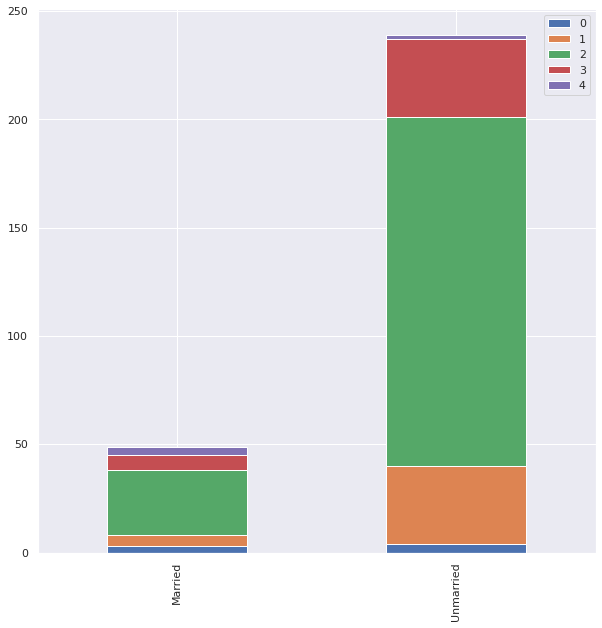

In [97]:
bar_chart('Age')

**Here,
1 = College, 2 = Honours, 3 = Masters, 4 = Medical, 5 = Completed,
6 = Incomplete.**

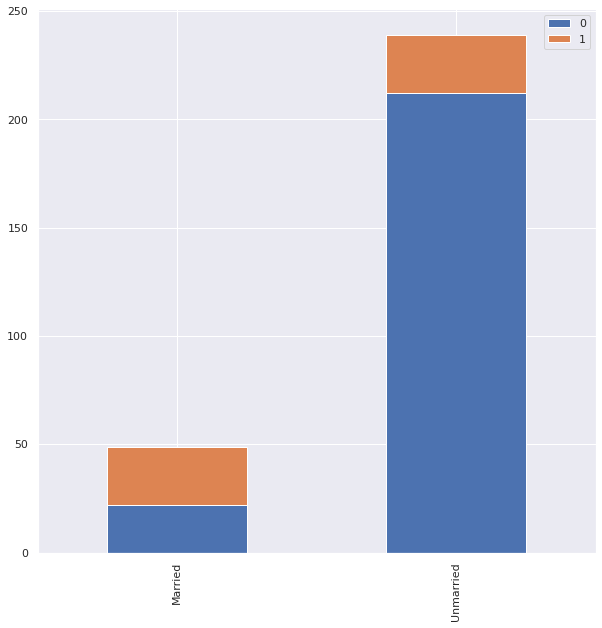

In [98]:
bar_chart('Sex')

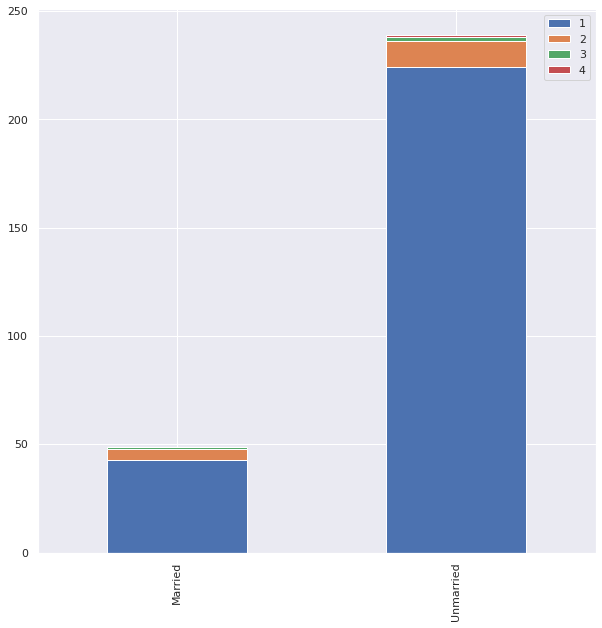

In [99]:
bar_chart('Religion')

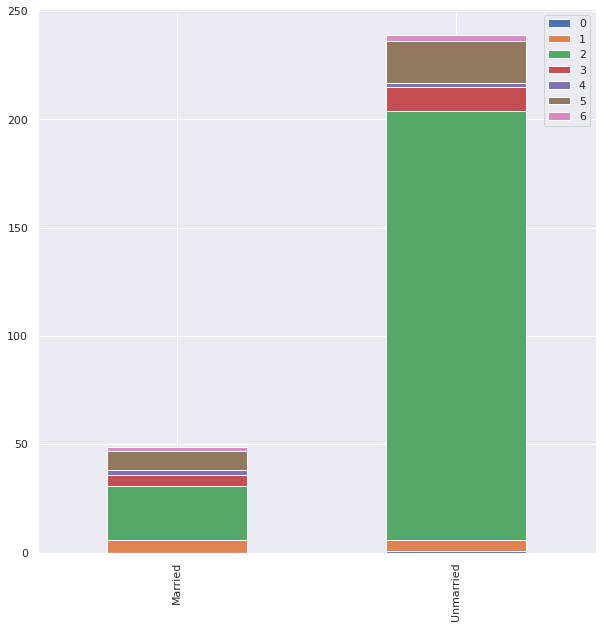

In [100]:
bar_chart('Study Stage')

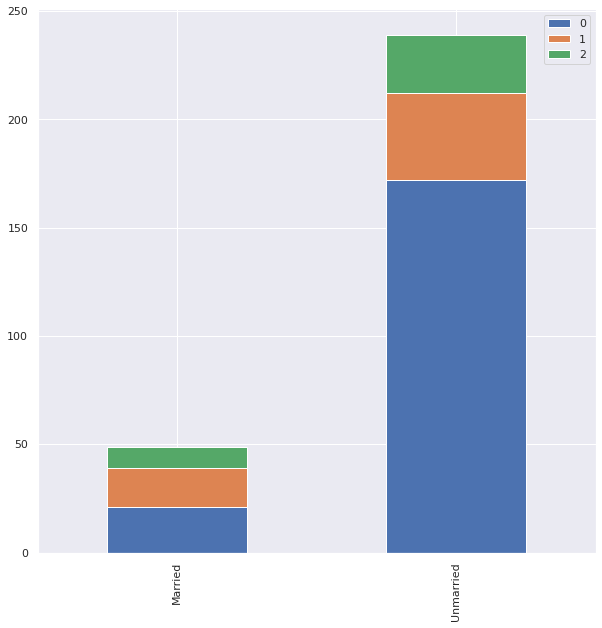

In [101]:
bar_chart('Personal Income')

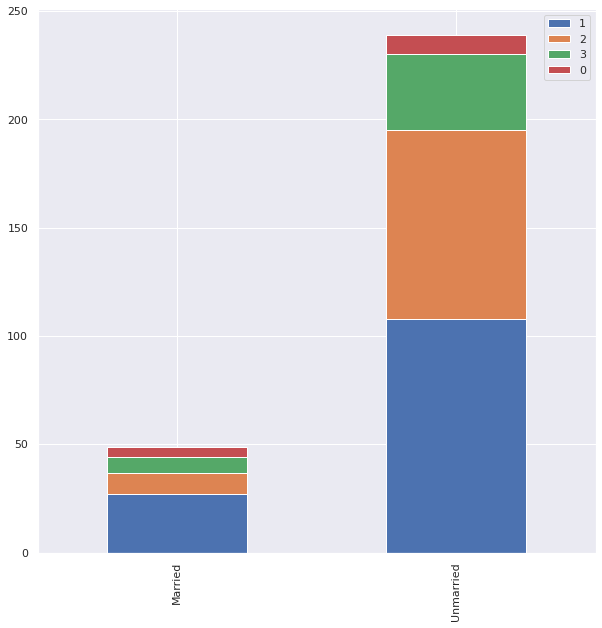

In [102]:
bar_chart('Family Income')

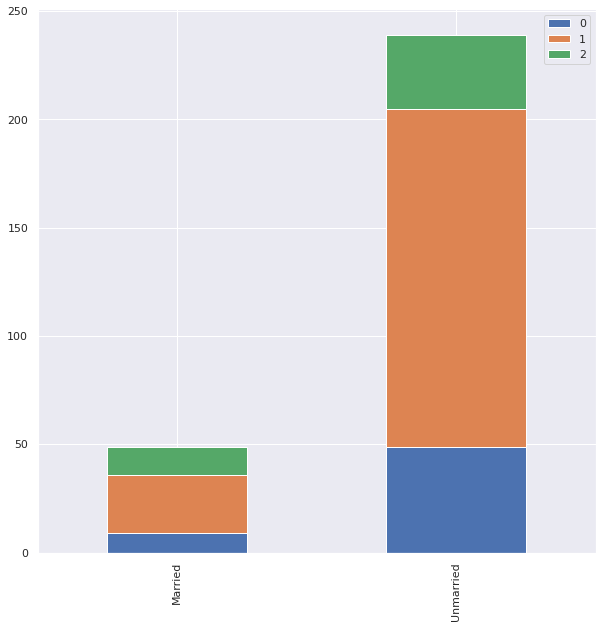

In [103]:
bar_chart('Family Status')

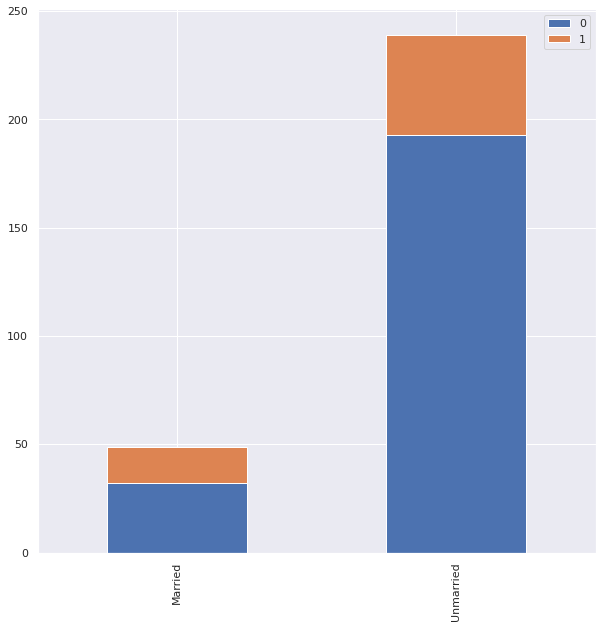

In [104]:
bar_chart('Joint Family')

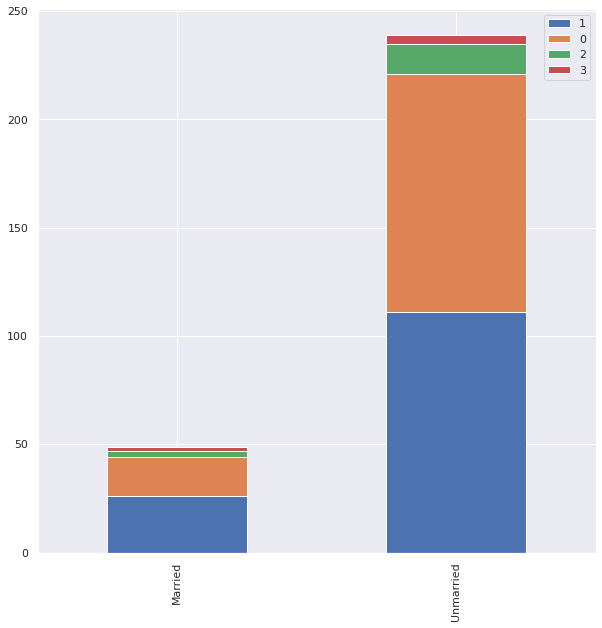

In [105]:
bar_chart('Family Members')

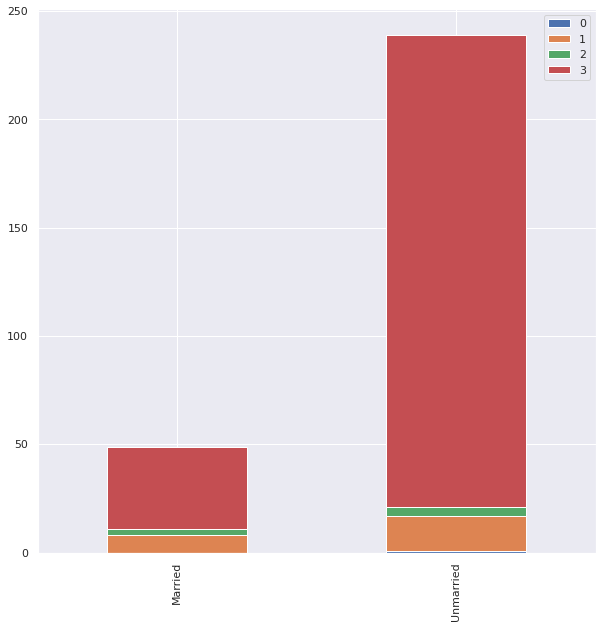

In [106]:
bar_chart('Parents alive')

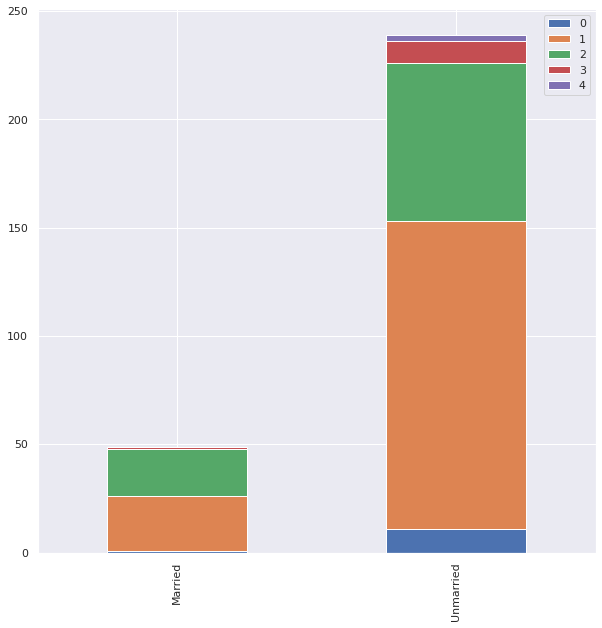

In [107]:
bar_chart('Siblings')

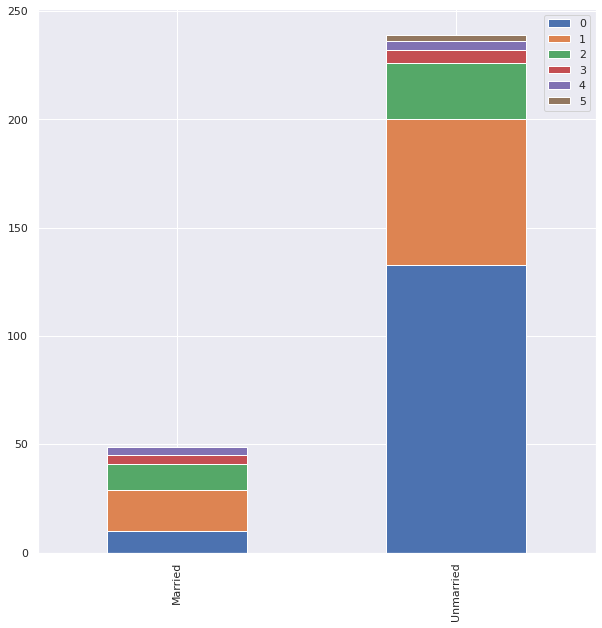

In [108]:
bar_chart('Married Siblings')

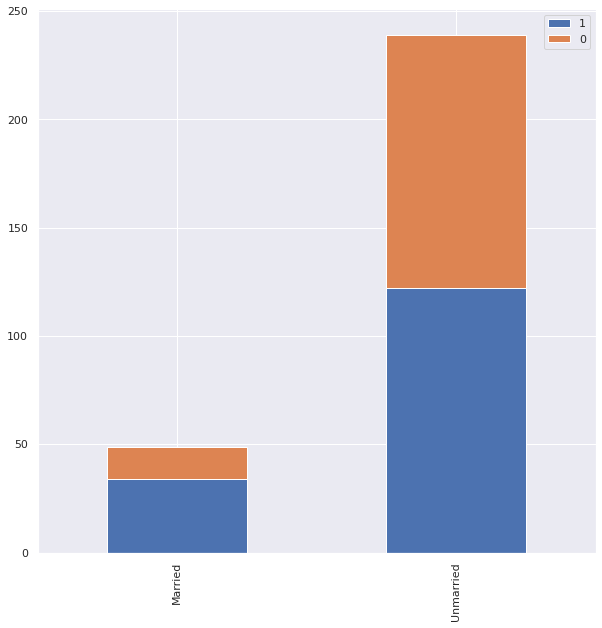

In [109]:
bar_chart('Previous relationship')

#**Preparing for algorithms** - Split train data

**Import train test split library**

In [110]:
from sklearn.model_selection import train_test_split

**Target attribute**

In [111]:
target = new_train2['Married status']

##Train Data 1 (21 columns)

In [112]:
train_data_1 = new_train2.drop(['Married status'], axis = 1)

In [113]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Priority of marraige in Islam  288 non-null    int64
 1   Age                            288 non-null    int64
 2   Sex                            288 non-null    int64
 3   Religion                       288 non-null    int64
 4   Study Stage                    288 non-null    int64
 5   Madrasa student                288 non-null    int64
 6   Career/Marriage                288 non-null    int64
 7   Personal Income                288 non-null    int64
 8   Family Income                  288 non-null    int64
 9   Family Status                  288 non-null    int64
 10  Joint Family                   288 non-null    int64
 11  Family Members                 288 non-null    int64
 12  Parents alive                  288 non-null    int64
 13  Siblings            

In [114]:
X1_train, X1_test, y1_train, y1_test = train_test_split(train_data_1, target, test_size=.30, random_state=42)
print("X1_train: ", X1_train.shape)
print("X1_test: ", X1_test.shape)
print("y1_train: ", y1_train.shape)
print("y1_test: ", y1_test.shape)

X1_train:  (201, 21)
X1_test:  (87, 21)
y1_train:  (201,)
y1_test:  (87,)


##Train Data 2 (13 columns)

In [115]:
train_data_2 = new_train2.drop(['Married status','Difficulty in love marriage','Arrange/love marriage','Family agree on relationship','Current Relationship','Target getting married','Career/Marriage','Priority of marraige in Islam','Madrasa student'], axis = 1)

In [116]:
train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    288 non-null    int64
 1   Sex                    288 non-null    int64
 2   Religion               288 non-null    int64
 3   Study Stage            288 non-null    int64
 4   Personal Income        288 non-null    int64
 5   Family Income          288 non-null    int64
 6   Family Status          288 non-null    int64
 7   Joint Family           288 non-null    int64
 8   Family Members         288 non-null    int64
 9   Parents alive          288 non-null    int64
 10  Siblings               288 non-null    int64
 11  Married Siblings       288 non-null    int64
 12  Previous relationship  288 non-null    int64
dtypes: int64(13)
memory usage: 29.4 KB


In [117]:
X2_train, X2_test, y2_train, y2_test = train_test_split(train_data_2, target, test_size=.30, random_state=42)
print("X2_train: ", X2_train.shape)
print("X2_test: ", X2_test.shape)
print("y2_train: ", y2_train.shape)
print("y2_test: ", y2_test.shape)

X2_train:  (201, 13)
X2_test:  (87, 13)
y2_train:  (201,)
y2_test:  (87,)


# **Applying Machine Learning Algorithms**

In [118]:
from sklearn.metrics import confusion_matrix,classification_report

In [119]:
from sklearn.metrics import accuracy_score

##Decision Tree Classifier algorithm

In [120]:
from sklearn.tree import DecisionTreeClassifier

### For Test Data 1

In [121]:
dt = DecisionTreeClassifier()
dt.fit(X1_train, y1_train)
y1_pred1 = dt.predict(X1_test)

Performance evaluation

In [122]:
print(confusion_matrix(y1_test, y1_pred1))
print(classification_report(y1_test, y1_pred1))
print(accuracy_score(y1_test, y1_pred1))

[[72  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        15

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87

1.0


### For Test Data 2

In [123]:
dt = DecisionTreeClassifier()
dt.fit(X2_train, y2_train)
y2_pred1 = dt.predict(X2_test)

Performance evaluation

In [124]:
print(confusion_matrix(y2_test, y2_pred1))
print(classification_report(y2_test, y2_pred1))
print(accuracy_score(y2_test, y2_pred1))

[[61 11]
 [10  5]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85        72
           1       0.31      0.33      0.32        15

    accuracy                           0.76        87
   macro avg       0.59      0.59      0.59        87
weighted avg       0.76      0.76      0.76        87

0.7586206896551724


##Random Forest Classifier algorithm

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X2_train, y2_train)
y2_pred2 = rfc.predict(X2_test)

Performance evaluation

In [127]:
print(confusion_matrix(y2_test, y2_pred2))
print(classification_report(y2_test, y2_pred2))
print(accuracy_score(y2_test, y2_pred2))

[[71  1]
 [11  4]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        72
           1       0.80      0.27      0.40        15

    accuracy                           0.86        87
   macro avg       0.83      0.63      0.66        87
weighted avg       0.85      0.86      0.83        87

0.8620689655172413
